<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Import Needed Libraries</h2>
</div>

In [6]:
 import os
import cv2
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf 
import keras 
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Reading Dataset And Get Info</h2>
</div>


#### Define Constraints

In [8]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
CHANNELS = 3

In [15]:
Class_Names = os.listdir(r"C:\Users\hi883\Downloads\archive (9)\dataset")
Class_Names_Dict = {name:idx for idx,name in enumerate(Class_Names)}
print(Class_Names_Dict)

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}


In [19]:
def Load_Data():
    dataset = r"C:\Users\hi883\Downloads\archive (9)\dataset"

    Images = []
    Labels = []

    for folder in os.listdir(dataset):
        print(f"Load Images from {folder} File")
        for file in tqdm(os.listdir(os.path.join(dataset,folder))):
            image_path = os.path.join(os.path.join(dataset,folder),file)
            image = cv2.imread(image_path)
            image = cv2.resize(image , IMAGE_SIZE)
            image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

            Images.append(image)
            Labels.append(Class_Names_Dict[folder])

    
    Images = np.array(Images , dtype='float32')
    Labels = np.array(Labels , dtype='int32')

    return (Images , Labels)

Images , Labels = Load_Data()
##%% md
#### Shuffle The Images

Load Images from cataract File


100%|██████████| 1038/1038 [00:17<00:00, 59.39it/s] 


Load Images from diabetic_retinopathy File


100%|██████████| 1098/1098 [00:10<00:00, 100.41it/s]


Load Images from glaucoma File


100%|██████████| 1007/1007 [00:14<00:00, 71.33it/s] 


Load Images from normal File


100%|██████████| 1074/1074 [00:10<00:00, 103.02it/s]


#### Shuffle The Images

In [24]:
Images , Labels = shuffle(Images , Labels , random_state=42)    

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">EDA of Images and Get Insights</h2>
</div>


#### Number of Images

In [27]:
##%%
print(f"Number of Total Images {Images.shape[0]}")
print(f"Size of Images {IMAGE_SIZE}")

Number of Total Images 4217
Size of Images (224, 224)


In [31]:
Train_Images , dummy_Images , Train_Labels , dummy_Labels = train_test_split(Images , Labels , test_size=0.3, random_state=42, stratify=Labels)
Val_Images , Test_Images , Val_Labels , Test_Labels = train_test_split(dummy_Images , dummy_Labels , test_size=0.5, random_state=42, stratify=dummy_Labels)

In [33]:
print(f"Number of Train Images {Train_Images.shape}")
print(f"Number of Train Labels {Train_Labels.shape}")
print(f"Number of Validation Images {Val_Images.shape}")
print(f"Number of Validation Labels {Val_Labels.shape}")
print(f"Number of Test Images {Test_Images.shape}")  
print(f"Number of Test Labels {Test_Labels.shape}")  

Number of Train Images (2951, 224, 224, 3)
Number of Train Labels (2951,)
Number of Validation Images (633, 224, 224, 3)
Number of Validation Labels (633,)
Number of Test Images (633, 224, 224, 3)
Number of Test Labels (633,)


In [35]:
_ , train_counts = np.unique(Train_Labels , return_counts=True)
_ , val_counts = np.unique(Val_Labels , return_counts=True)
_ , test_counts = np.unique(Test_Labels , return_counts=True)

df = pd.DataFrame({
    'Train': train_counts,'Validation': val_counts, 'Test': test_counts
}, index=Class_Names)

df

Train  Validation  Test
cataract                726         156   156
diabetic_retinopathy    768         165   165
glaucoma                705         151   151
normal                  752         161   161

<Figure size 1000x600 with 0 Axes>

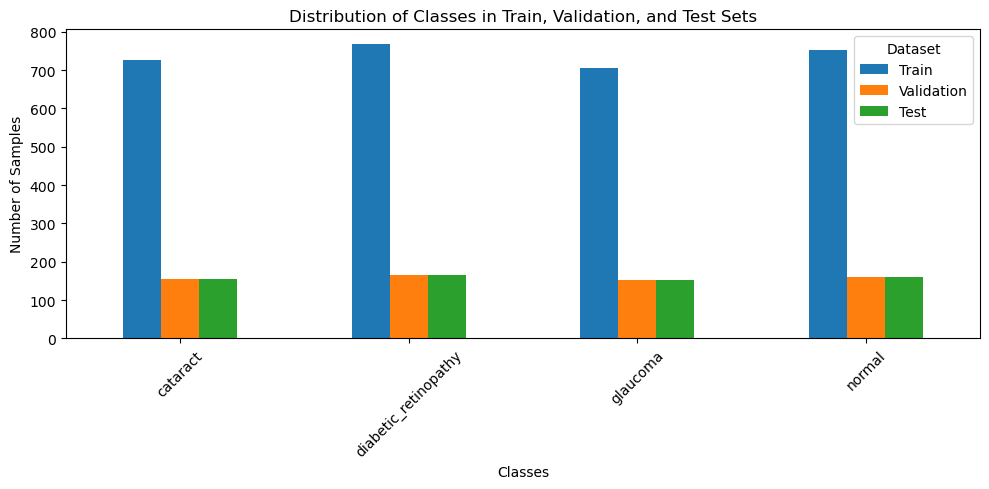

In [37]:
plt.figure(figsize=(10, 6))
df.plot(kind='bar',figsize=(10,5))
plt.title('Distribution of Classes in Train, Validation, and Test Sets')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

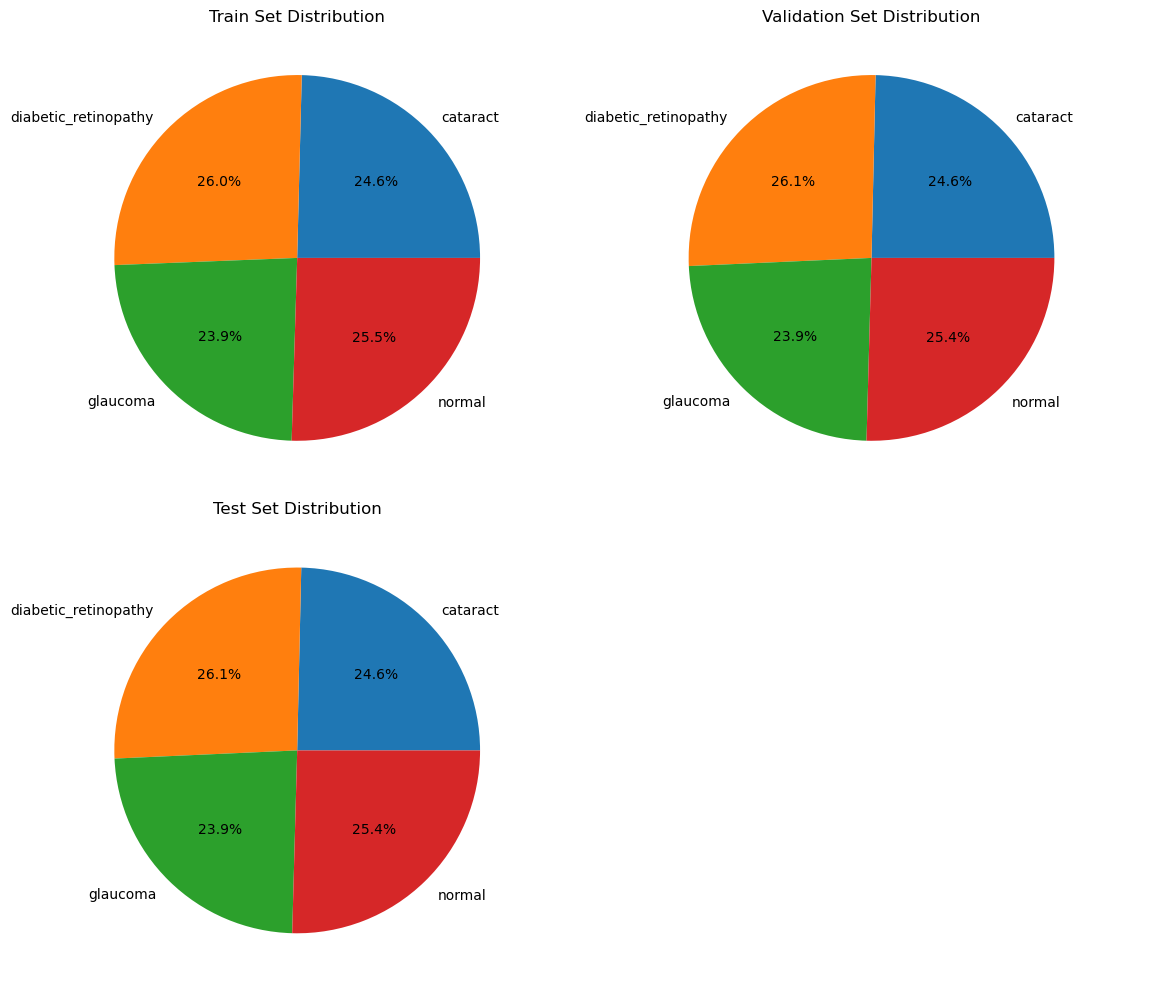

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

df.plot.pie(y='Train', autopct='%1.1f%%', title='Train Set Distribution', ax=axs[0,0], legend=False, ylabel='')
df.plot.pie(y='Validation', autopct='%1.1f%%', title='Validation Set Distribution', ax=axs[0,1], legend=False, ylabel='')
df.plot.pie(y='Test', autopct='%1.1f%%', title='Test Set Distribution', ax=axs[1,0], legend=False, ylabel='')

axs[1,1].axis('off')

plt.tight_layout()
plt.show()

#### Images In Dataset

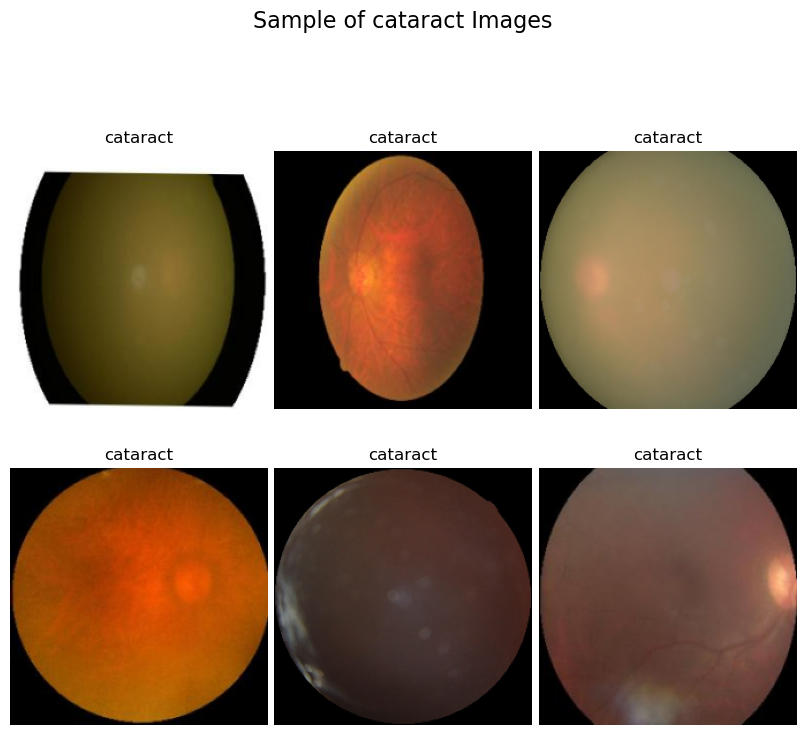

In [42]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[0]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 0)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')  # Hide axis for cleaner look
    plt.title(f'{Class_Names[0]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88)  # Adjust top to fit the suptitle
plt.show()

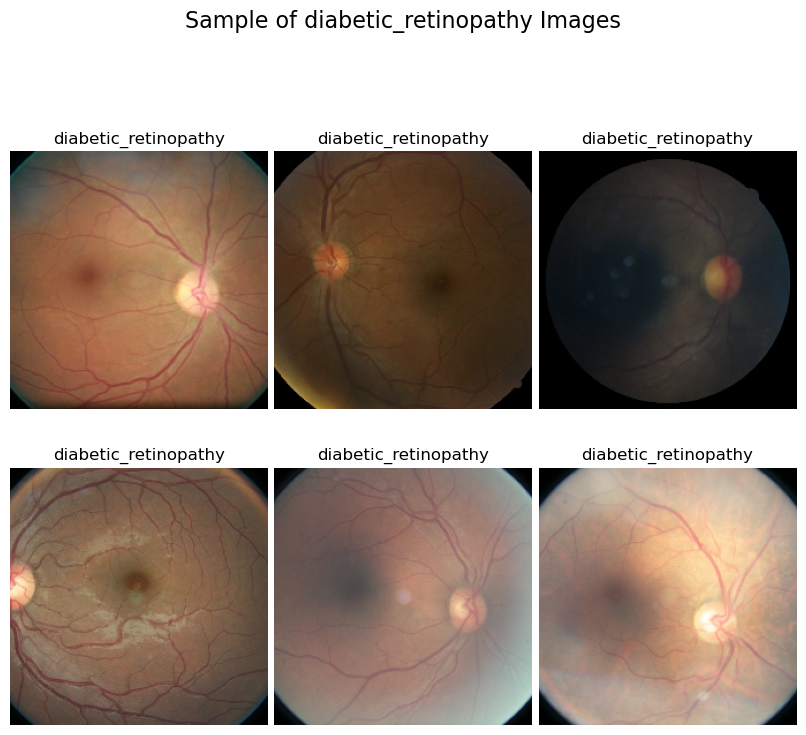

In [44]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[1]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 1)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off') 
    plt.title(f'{Class_Names[1]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88) 
plt.show()

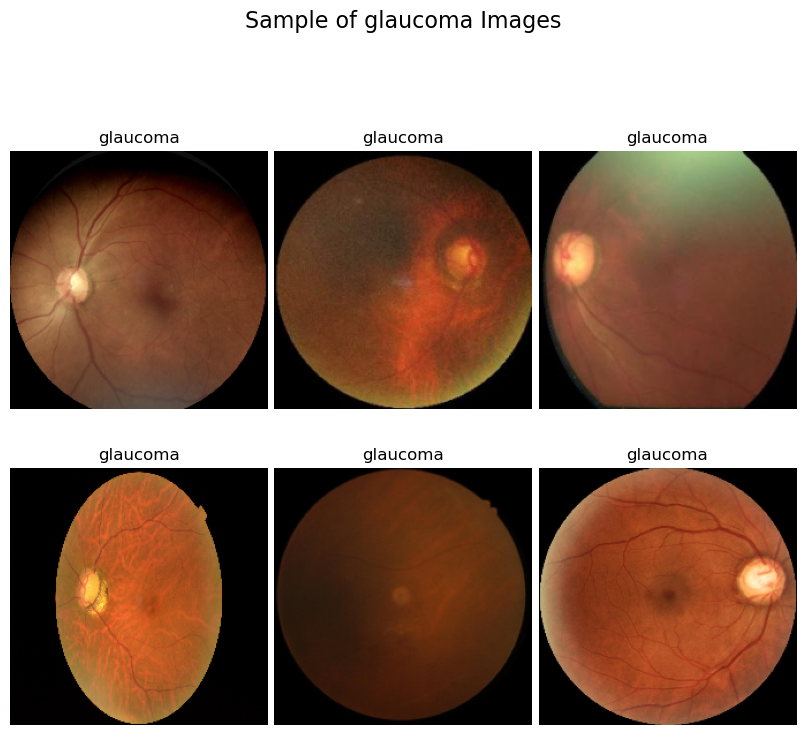

In [46]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[2]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 2)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off') 
    plt.title(f'{Class_Names[2]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88) 
plt.show()

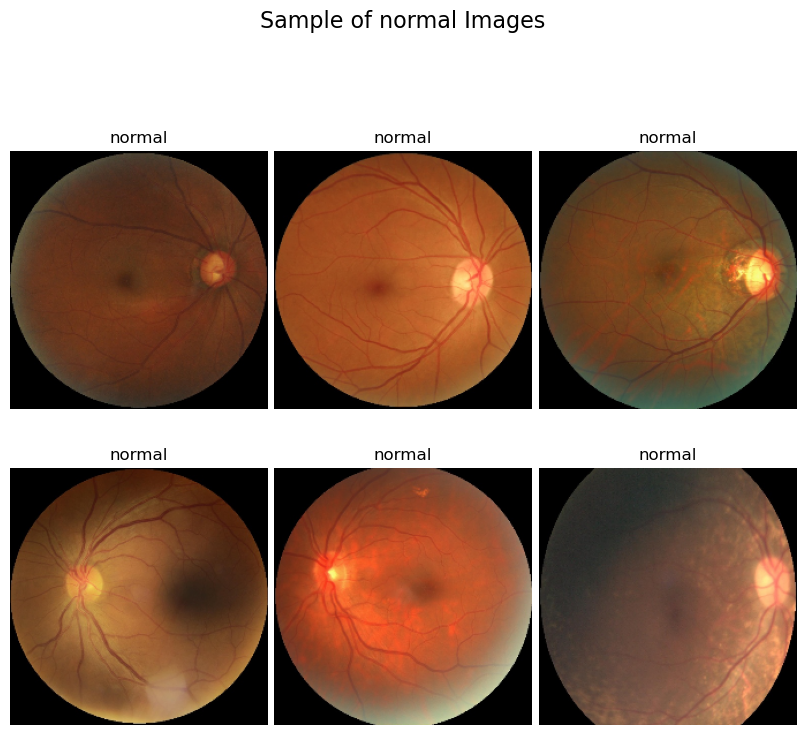

In [48]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[3]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 3)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off') 
    plt.title(f'{Class_Names[3]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88) 
plt.show()

#### Transfer Learning

In [53]:
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   )

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)

train_generator = train_datagen.flow(x=Train_Images,
    y=Train_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,   
)

val_generator = val_datagen.flow(x=Val_Images,
    y=Val_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_generator = test_datagen.flow(x=Test_Images,
    y=Test_Labels,
    batch_size=BATCH_SIZE,
    shuffle=False,
)


In [55]:
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights='imagenet',
                   include_top=False,
                   input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], CHANNELS))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build custom top layers
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
outputs = keras.layers.Dense(4, activation='softmax')(x)

# Define the final model
model_ResNet50 = keras.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model_ResNet50.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

best_model_callback = keras.callbacks.ModelCheckpoint('model_ResNet50.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)  

# Train the model
history_model_ResNet50 = model_ResNet50.fit(
   train_generator,
    epochs=200,
    validation_data=val_generator,
    callbacks=[
        early_stopping_callback,
        best_model_callback,
    ])

Epoch 1/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6779 - loss: 1.1301

93/93 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.6788 - loss: 1.1255 - val_accuracy: 0.7994 - val_loss: 0.5397
Epoch 2/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8639 - loss: 0.3405

93/93 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8640 - loss: 0.3406 - val_accuracy: 0.8088 - val_loss: 0.5323
Epoch 3/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8785 - loss: 0.3148

93/93 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8784 - loss: 0.3147 - val_accuracy: 0.8167 - val_loss: 0.4814
Epoch 4/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8886 - loss: 0.2808 - val_accuracy: 0.7962 - val_loss: 0.5901
Epoch 5/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9194 - loss: 0.2317 - val_accuracy: 0.8404 - val_loss: 0.5068
Epoch 6/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9081 - loss: 0.2453

93/93 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9080 - loss: 0.2454 - val_accuracy: 0.8167 - val_loss: 0.4493
Epoch 7/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8943 - loss: 0.2880

93/93 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.8944 - loss: 0.2878 - val_accuracy: 0.8610 - val_loss: 0.3556
Epoch 8/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9052 - loss: 0.2432

93/93 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9053 - loss: 0.2429 - val_accuracy: 0.8578 - val_loss: 0.3522
Epoch 9/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.9190 - loss: 0.2113 - val_accuracy: 0.8310 - val_loss: 0.4874
Epoch 10/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9053 - loss: 0.2379 - val_accuracy: 0.8610 - val_loss: 0.4223
Epoch 11/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9293 - loss: 0.1930

93/93 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.9293 - loss: 0.1928 - val_accuracy: 0.8863 - val_loss: 0.3152
Epoch 12/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9286 - loss: 0.1800 - val_accuracy: 0.8515 - val_loss: 0.3704
Epoch 13/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9355 - loss: 0.1575

93/93 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9354 - loss: 0.1577 - val_accuracy: 0.8768 - val_loss: 0.3077
Epoch 14/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9298 - loss: 0.1860

93/93 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9298 - loss: 0.1858 - val_accuracy: 0.9005 - val_loss: 0.3045
Epoch 15/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9512 - loss: 0.1268 - val_accuracy: 0.8910 - val_loss: 0.3355
Epoch 16/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9301 - loss: 0.1575 - val_accuracy: 0.8594 - val_loss: 0.4827
Epoch 17/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9509 - loss: 0.1433

93/93 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9509 - loss: 0.1433 - val_accuracy: 0.8878 - val_loss: 0.2829
Epoch 18/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9533 - loss: 0.1237 - val_accuracy: 0.8752 - val_loss: 0.3562
Epoch 19/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9470 - loss: 0.1340 - val_accuracy: 0.8847 - val_loss: 0.3381
Epoch 20/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9529 - loss: 0.1243 - val_accuracy: 0.8768 - val_loss: 0.4042
Epoch 21/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9487 - loss: 0.1210 - val_accuracy: 0.8689 - val_loss: 0.4029
Epoch 22/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9595 - loss: 0.1088

93/93 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9595 - loss: 0.1089 - val_accuracy: 0.9084 - val_loss: 0.2695
Epoch 23/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9619 - loss: 0.0904 - val_accuracy: 0.8973 - val_loss: 0.3037
Epoch 24/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9384 - loss: 0.1315 - val_accuracy: 0.7141 - val_loss: 1.3071
Epoch 25/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9365 - loss: 0.1914 - val_accuracy: 0.8878 - val_loss: 0.3419
Epoch 26/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9639 - loss: 0.0951 - val_accuracy: 0.8799 - val_loss: 0.3815
Epoch 27/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9672 - loss: 0.0812 - val_accuracy: 0.9036 - val_loss: 0.2937
Epoch 28/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9697 - loss: 0.0769 - val_accuracy: 0.8973 - val_loss: 0.3020
Epoch 29/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.9744 - loss: 0.0687 - val_accuracy: 0.8768 

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Evaluate ResNet50</h2>
</div>

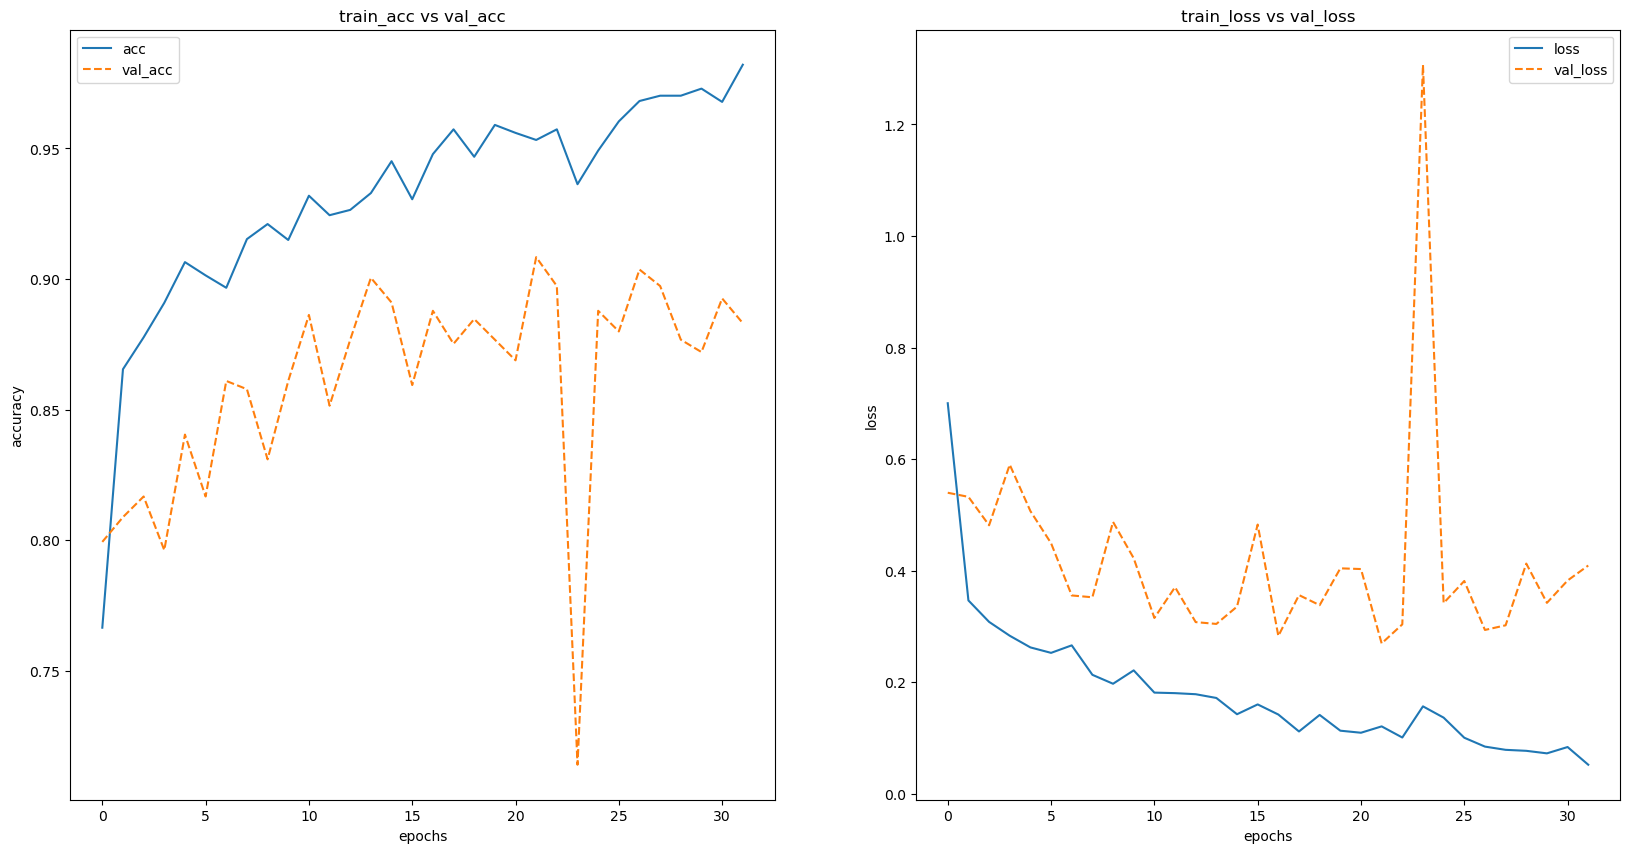

In [64]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'],'-', label="acc")
    plt.plot(history.history['val_accuracy'], '--', label="val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(122)
    plt.plot(history.history['loss'],'-', label="loss")
    plt.plot(history.history['val_loss'], '--', label="val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()

plot_accuracy_loss(history_model_ResNet50)


In [60]:
model = keras.models.load_model('model_ResNet50.h5')   
predictions = model.predict(test_generator)            # Vector of probabilities
pred_labels = np.argmax(predictions, axis=1)           # We take the highest probability


20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


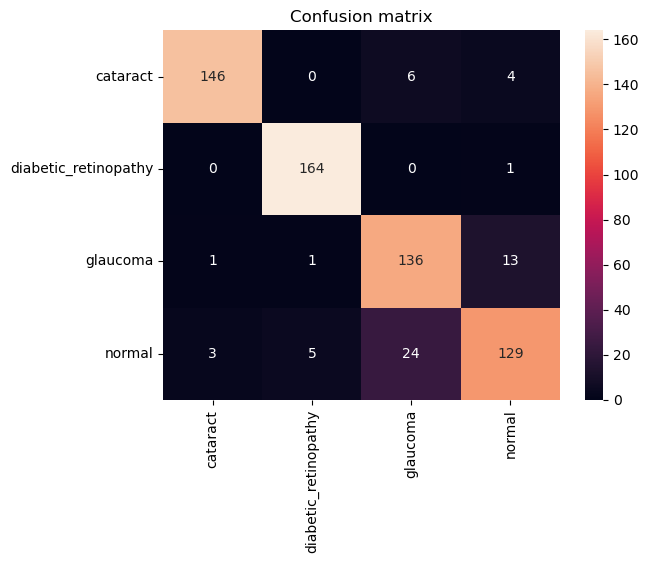

In [66]:
CM = confusion_matrix(Test_Labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True,
            annot_kws={"size": 10},
            xticklabels=Class_Names_Dict.keys(),
            yticklabels=Class_Names_Dict.keys(),
            ax=ax,
            fmt='d')
ax.set_title('Confusion matrix')
plt.show()


In [68]:
print(classification_report(Test_Labels,
                            pred_labels,
                            target_names=Class_Names_Dict.keys()))


                      precision    recall  f1-score   support

            cataract       0.97      0.94      0.95       156
diabetic_retinopathy       0.96      0.99      0.98       165
            glaucoma       0.82      0.90      0.86       151
              normal       0.88      0.80      0.84       161

            accuracy                           0.91       633
           macro avg       0.91      0.91      0.91       633
        weighted avg       0.91      0.91      0.91       633



<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Predicting with ResNet50</h2>
</div>

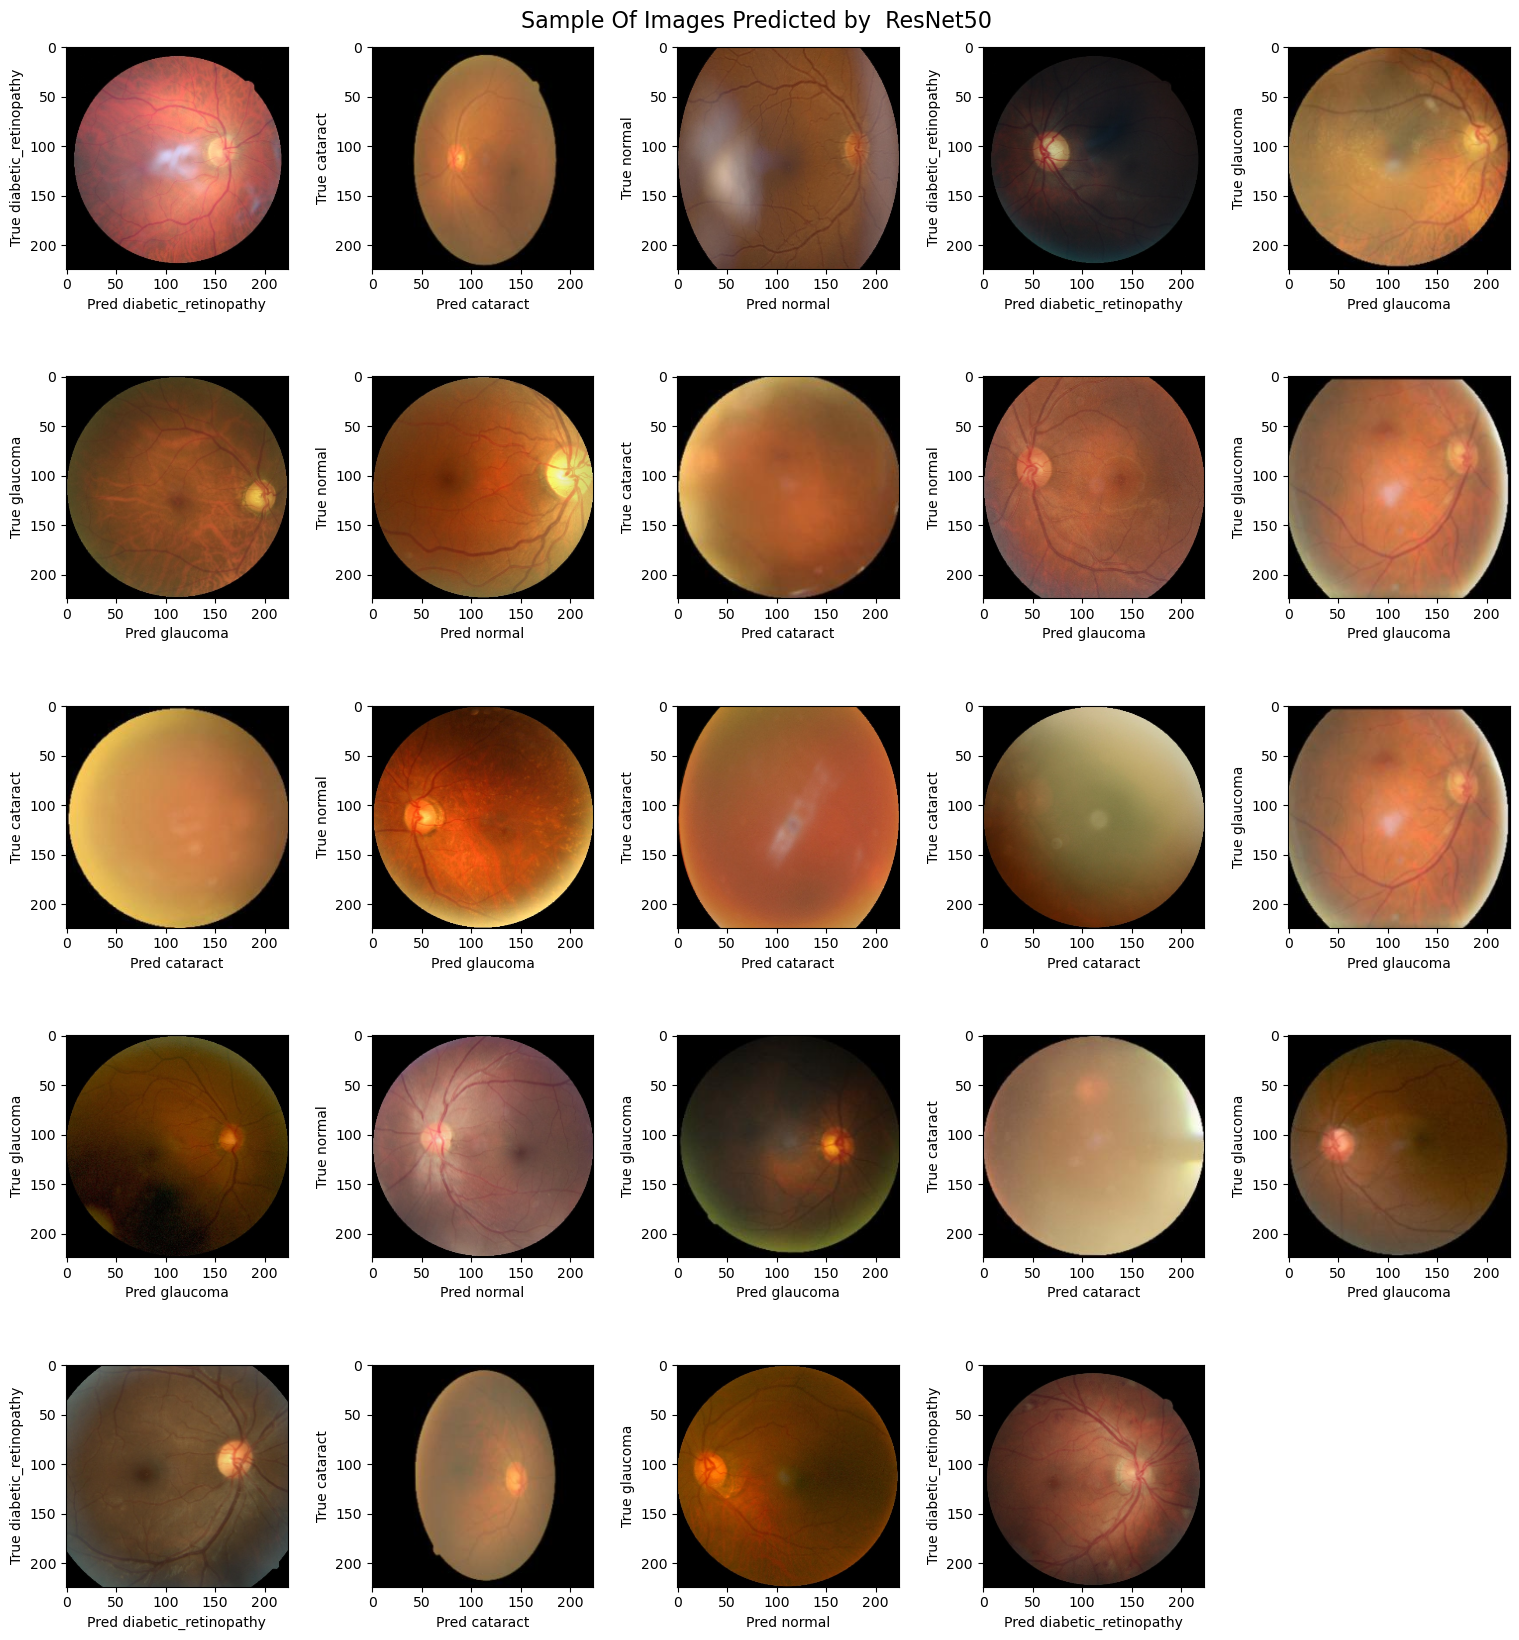

In [73]:
plt.figure(figsize=(15,20))
plt.suptitle(f"Sample Of Images Predicted by  ResNet50 " , fontsize=16)

for i in range(24):
    plt.subplot(6,5,i+1)
    idx = np.random.choice(np.arange(len(pred_labels)))
    plt.imshow(Test_Images[idx] / 255.0)
    plt.xlabel(f'Pred {Class_Names[pred_labels[idx]]}')
    plt.ylabel(f'True {Class_Names[Test_Labels[idx]]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=2)

In [75]:
model_ResNet50.save("model_ResNet50.h5")


In [81]:
import os
print(os.getcwd())       # يطبع مكان الملف الحالي
print(os.listdir())      # يطبع كل الملفات فيه


C:\Users\hi883
['.anaconda', '.astropy', '.bash_history', '.cache', '.conda', '.condarc', '.config', '.continuum', '.dotnet', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.lesshst', '.matplotlib', '.packettracer', '.spyder-py3', '.streamlit', '.templateengine', '.virtual_documents', '.vscode', '01_gray.png', '02_thresh.png', '03_opened.png', '04_closed.png', '05_result.png', '1', 'anaconda3', 'AppData', 'Application Data', 'augmented_dataset', 'augmented_dataset_path', 'best_model.keras', 'circle_1.png', 'circle_2.png', 'circle_3.png', 'Cisco Packet Tracer 8.2.2', 'Contacts', 'Cookies', 'copy_myphoto.jpg', 'cropped_new.jpg', 'data', 'Documents', 'dog.jpg', 'Downloads', 'Favorites', 'flip_horizontal_new.jpg', 'flip_vertical_new.jpg', 'IntelGraphicsProfiles', 'Jedi', 'jupyter', 'Links', 'Local Settings', 'Microsoft', 'model.pkl', 'model_ResNet50.h5', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{bb11f86c-ee42

In [83]:
import os
os.getcwd()


'C:\\Users\\hi883'

In [85]:
import shutil

shutil.move(
    r"C:\Users\hi883\model_ResNet50.h5",
    r"C:\Users\hi883\Downloads\model_ResNet50.h5"
)


'C:\\Users\\hi883\\Downloads\\model_ResNet50.h5'